1. Подберите скорость обучения (alpha) и количество итераций для достижения минимальног значения функции потерь.


for i in range(1000):
y_pred = np.dot(W, X)
err = calc_mse(y, y_pred)
'''for ii in range(W.shape[0]):
W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
if i % 100 == 0:
print(i, W, err)

2 (опция). В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

for i in range(1000):
y_pred = np.dot(W, X)
err = calc_mse(y, y_pred)
'''for ii in range(W.shape[0]):
W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
if i % 100 == 0:
print(i, W, err)


3 (опция). Реализовать один из критериев останова, перечисленный в методичке.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
X.shape
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [15]:
# функция вычисления ошибки
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [16]:
# функция модели линейной регрессии методом градиентного спуска

def fit_linear_model(X: np.array,
                     y: np.array,
                     alpha: float = 0.01,
                     iteration: int = 100000,
                     hysteresis: float = 1e-5):
    weights = np.random.randn(X.shape[0])
    errors_history, weights_history = [], [weights]

    for iteration in range(iteration):
        y_pred = np.dot(weights, X)
        current_error = calc_mse(y, y_pred)
        weights = weights - 2*alpha*np.sum(X*(y_pred - y), axis=1)/len(y_pred)
        errors_history.append(current_error)
        weights_history.append(weights)

        if iteration > 2 and np.abs(current_error - errors_history[-2]) < hysteresis:
            break
        
    return weights, weights_history, errors_history

In [17]:
def plot_fit_history(weights_history: np.array,
                     errors_history: np.array,
                     figsize=(15, 5)) -> None:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(
        f"Optional rounds: {len(errors_history)}, Error: {round(errors_history[-1], 2)}",
        size=15
    )
    plt.subplot(121)
    plt.plot(errors_history, linewidth=3)
    plt.xlabel("n_iterations", size=15)
    plt.ylabel("MSE", size=15)

    plt.subplot(122)
    plt.plot(weights_history, linewidth=3)
    plt.legend([f"$w_{i}$" for i in range(len(weights_history[0]))], loc="best", fontsize=15)
    plt.xlabel("n_iterations", size=15)
    plt.ylabel("w", size=15)

learning_rate = 0.1, n_iterations = 100000


/home/sergey/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/sergey/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


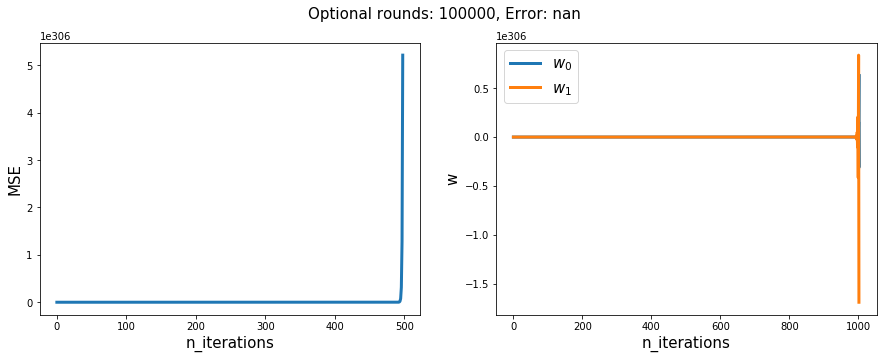

In [18]:
alpha = 0.1
iteration = 100000
print(f"learning_rate = {alpha}, n_iterations = {iteration}")
weights, weights_history, errors_history = fit_linear_model(X, y, alpha=alpha, iteration=iteration)
plot_fit_history(weights_history, errors_history)

learning_rate = 0.01, n_iterations = 100000


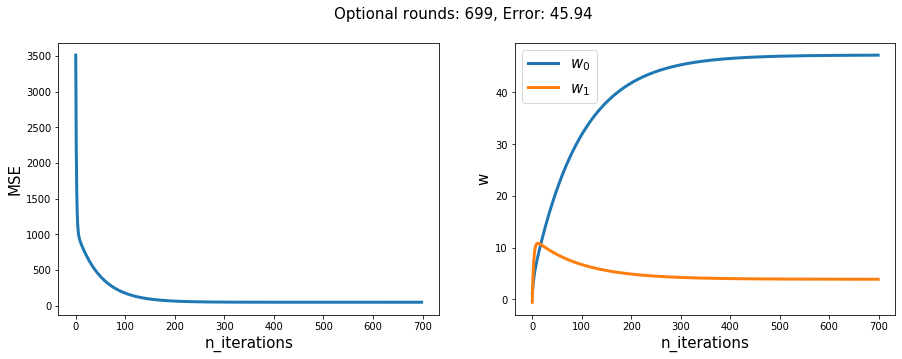

In [19]:
alpha = 0.01
iteration = 100000
print(f"learning_rate = {alpha}, n_iterations = {iteration}")
weights, weights_history, errors_history = fit_linear_model(X, y, alpha=alpha, iteration=iteration)
plot_fit_history(weights_history, errors_history)

learning_rate = 0.001, n_iterations = 100000


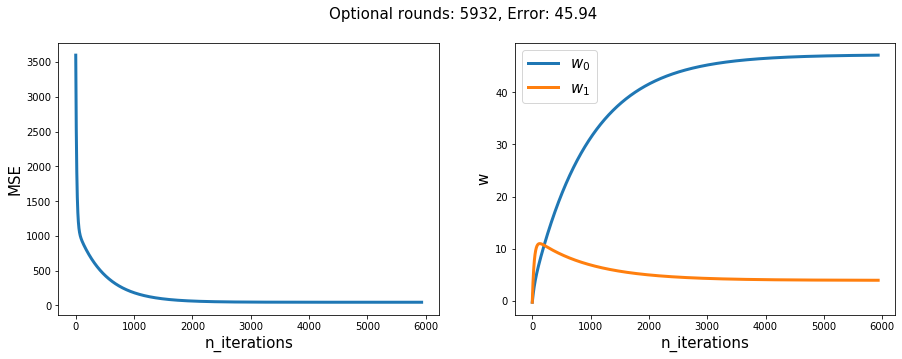

In [20]:
alpha = 0.001
iteration = 100000
print(f"learning_rate = {alpha}, n_iterations = {iteration}")
weights, weights_history, errors_history = fit_linear_model(X, y, alpha=alpha, iteration=iteration)
plot_fit_history(weights_history, errors_history)

learning_rate = 0.0001, n_iterations = 100000


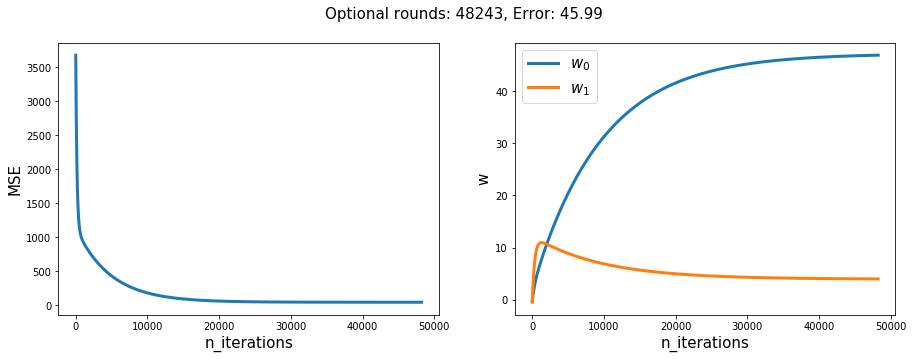

In [21]:
alpha = 0.0001
iteration = 100000
print(f"learning_rate = {alpha}, n_iterations = {iteration}")
weights, weights_history, errors_history = fit_linear_model(X, y, alpha=alpha, iteration=iteration)
plot_fit_history(weights_history, errors_history)